In [1]:
import matplotlib.pyplot as plt
import soundfile as sf
import pandas as pd
import numpy as np
from scipy.signal import find_peaks

In [2]:
def autocorrelate(audio: np.ndarray) -> np.ndarray:
	return np.correlate(audio, audio, mode = 'full')[len(audio) - 1:]


def plot_signal(signal: np.ndarray, rec_title: str):
    plt.plot(signal)
    plt.title(rec_title)
    plt.show()


def plot_autocorrelation(lags: np.ndarray, rec_title: str):
    plt.plot(lags)
    plt.title(f'Autocorrelation of {rec_title}')
    plt.show()


def estimate_period_raw(audio_path: str, tolerance: float):
    audio, sample_rate = sf.read(audio_path)
    tol_samples = round(sample_rate * tolerance)
    peaks, _ = find_peaks(audio, height = 0.7 * audio.max(), distance = tol_samples)
    peaks_shift = np.roll(peaks, 1)
    peaks_shift[0] = 0
    t_mean = np.mean(peaks[1:] - peaks_shift[1:])
    return t_mean, np.mean(audio[peaks]), audio.max()


def estimate_period(audio_path: str, tolerance: float):
    audio, sample_rate = sf.read(audio_path)
    lags = autocorrelate(audio)
    return estimate_period_from_lags(lags, sample_rate, tolerance)


def estimate_period_from_lags(lags: np.ndarray, sample_rate: int, tolerance: float):
    tol_samples = round(sample_rate * tolerance)
    lags[:tol_samples] = 0.0
    r_peaks, _ = find_peaks(lags, height = 0.7 * lags.max(), distance = tol_samples)
    peaks_shift = np.roll(r_peaks, 1)
    peaks_shift[0] = 0
    t_mean = np.mean(r_peaks - peaks_shift)
    return t_mean, np.mean(lags[r_peaks]), lags.max()

In [3]:
bs_data = pd.read_csv('_data.export/s2.0-o1.0/brood-size.csv')
bs_data = bs_data.loc[~bs_data['is_silence'] & (bs_data['event'] == 'contact')]
bs_data['file'] = 'C:/Users/barto/Devel/sfw-work/s2.0-o1.0/' + bs_data['file']
bs_data = bs_data['file'].sample(n = 10).reset_index().drop(columns = 'index')
bs_data

,file
0,C:/Users/barto/Devel/sfw-work/s2.0-o1.0/Furka3...
1,C:/Users/barto/Devel/sfw-work/s2.0-o1.0/AT_1_2...
2,C:/Users/barto/Devel/sfw-work/s2.0-o1.0/AT_1_2...
3,C:/Users/barto/Devel/sfw-work/s2.0-o1.0/AT_2_2...
4,C:/Users/barto/Devel/sfw-work/s2.0-o1.0/Furka1...
5,C:/Users/barto/Devel/sfw-work/s2.0-o1.0/Furka3...
6,C:/Users/barto/Devel/sfw-work/s2.0-o1.0/Furka1...
7,C:/Users/barto/Devel/sfw-work/s2.0-o1.0/Furka3...
8,C:/Users/barto/Devel/sfw-work/s2.0-o1.0/Furka1...
9,C:/Users/barto/Devel/sfw-work/s2.0-o1.0/Furka1...


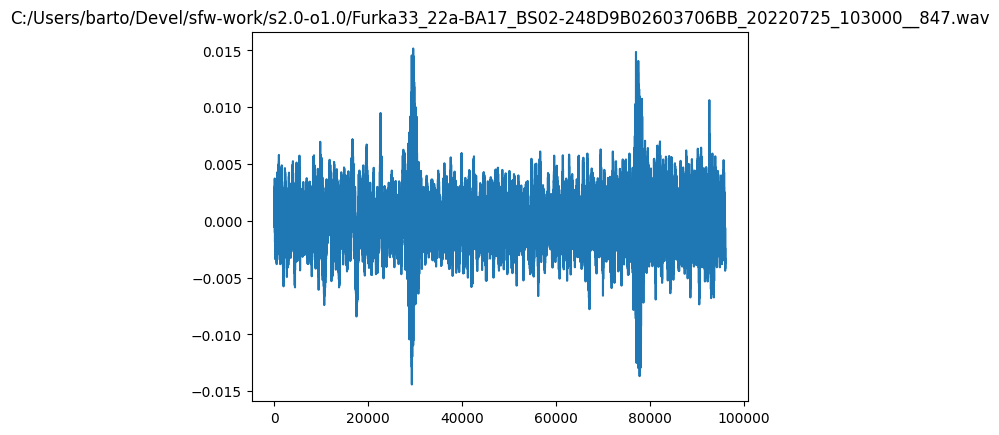

Raw signal: period = 31527.0, mean from peaks = 0.0135498046875, r max = 0.015167236328125


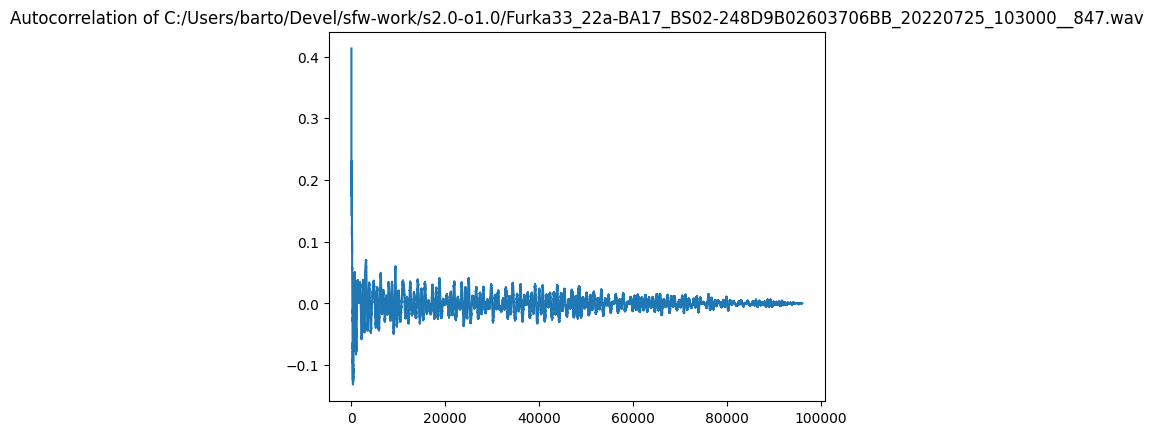

Autocorrelation: period = 17173.0, mean from peaks = 0.03743317583575845, r max = 0.0412436630576849


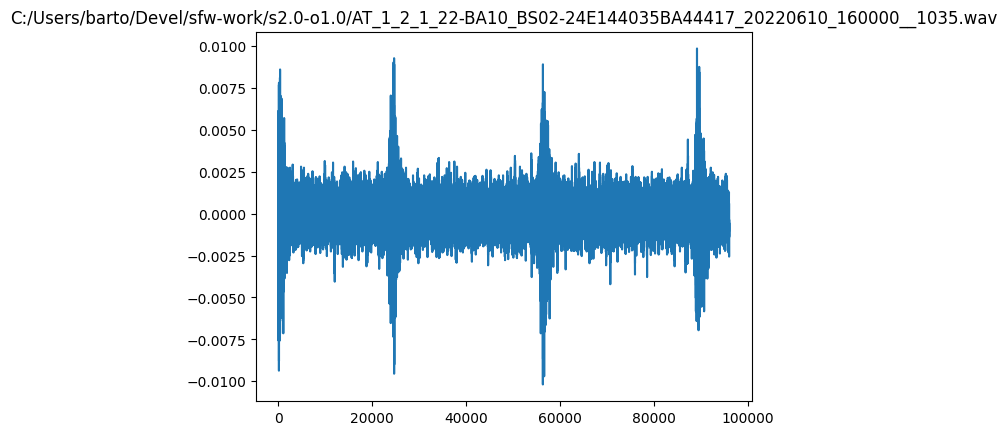

Raw signal: period = 29587.333333333332, mean from peaks = 0.00916290283203125, r max = 0.009857177734375


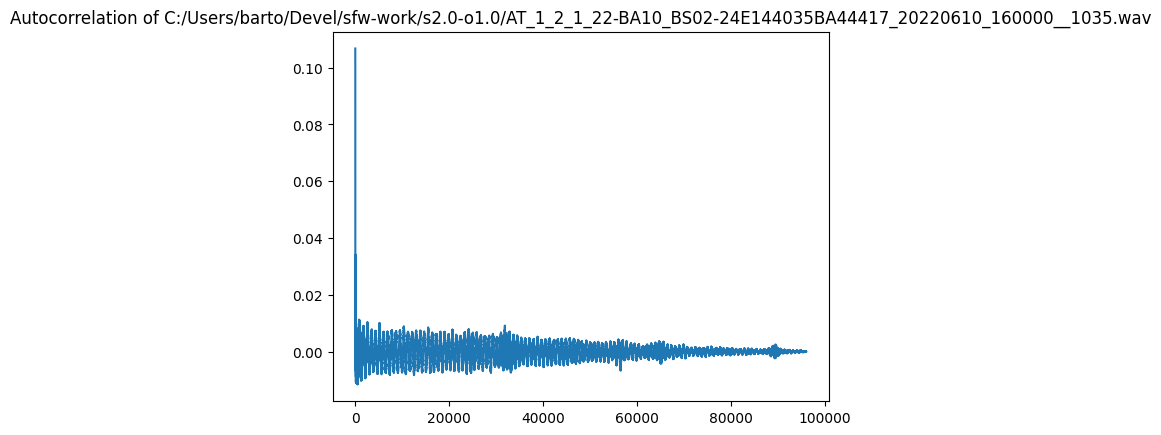

Autocorrelation: period = 10613.0, mean from peaks = 0.008601740002632141, r max = 0.009155342355370522


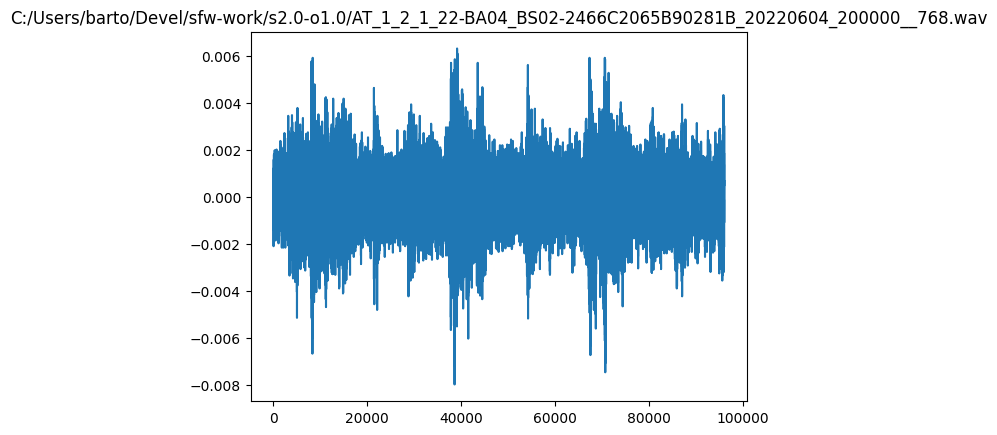

Raw signal: period = 15548.0, mean from peaks = 0.005682373046875, r max = 0.006317138671875


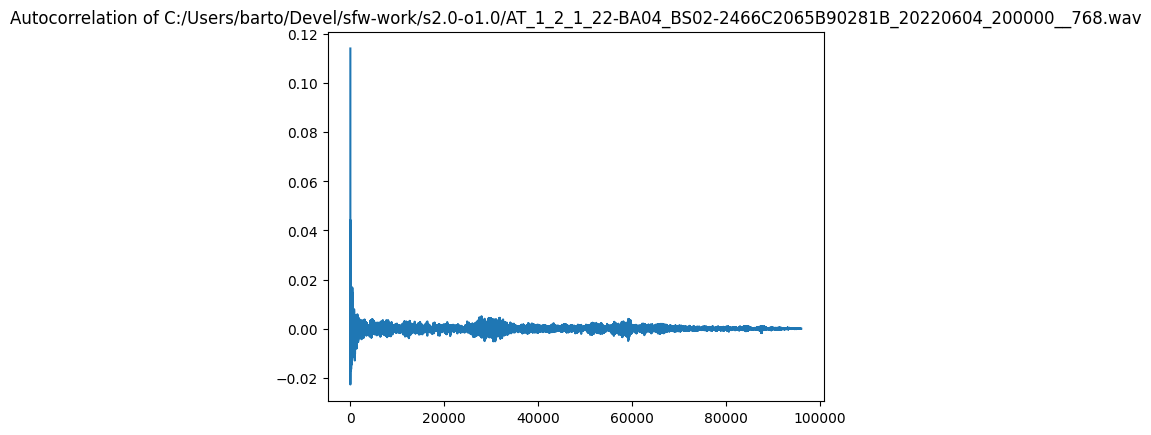

Autocorrelation: period = 29586.5, mean from peaks = 0.0045005446299910545, r max = 0.005048335529863834


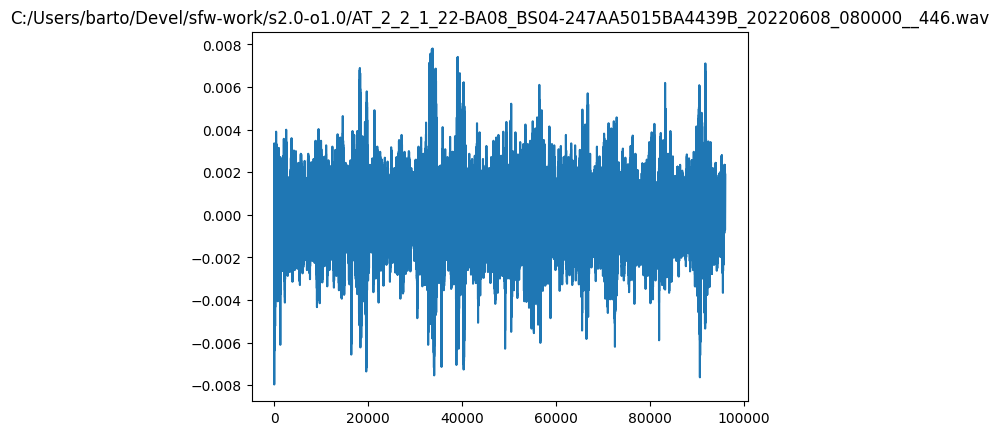

Raw signal: period = 18389.25, mean from peaks = 0.00672607421875, r max = 0.0078125


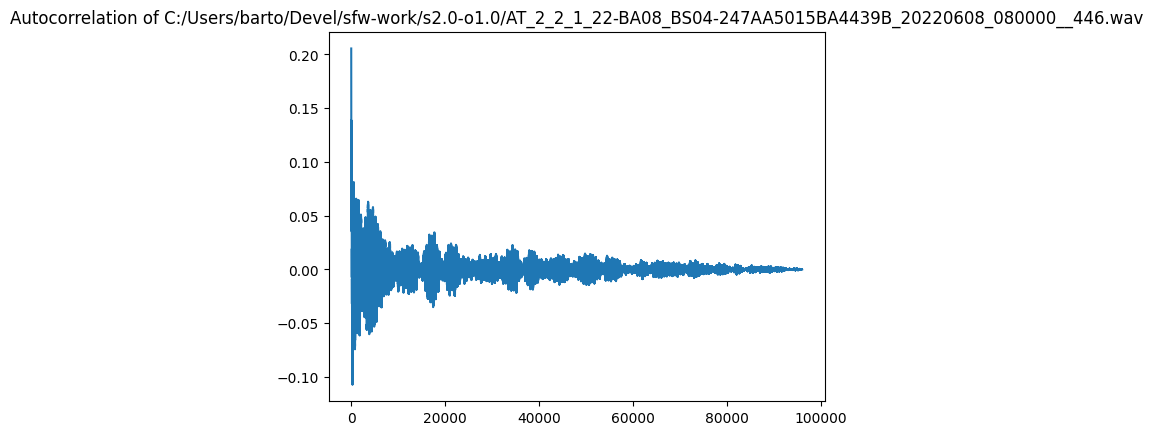

Autocorrelation: period = 17701.0, mean from peaks = 0.0345086669549346, r max = 0.0345086669549346


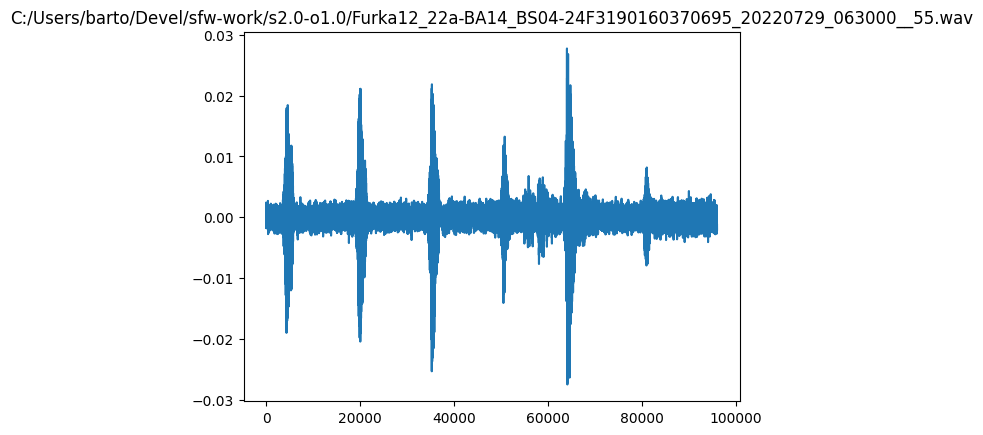

Raw signal: period = 21994.5, mean from peaks = 0.023569742838541668, r max = 0.027740478515625


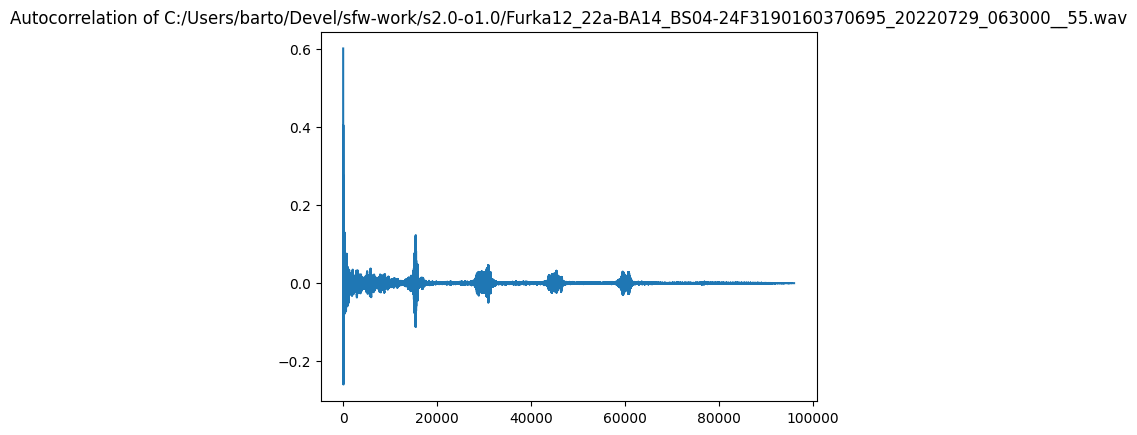

Autocorrelation: period = 15454.0, mean from peaks = 0.12292593531310558, r max = 0.12292593531310558


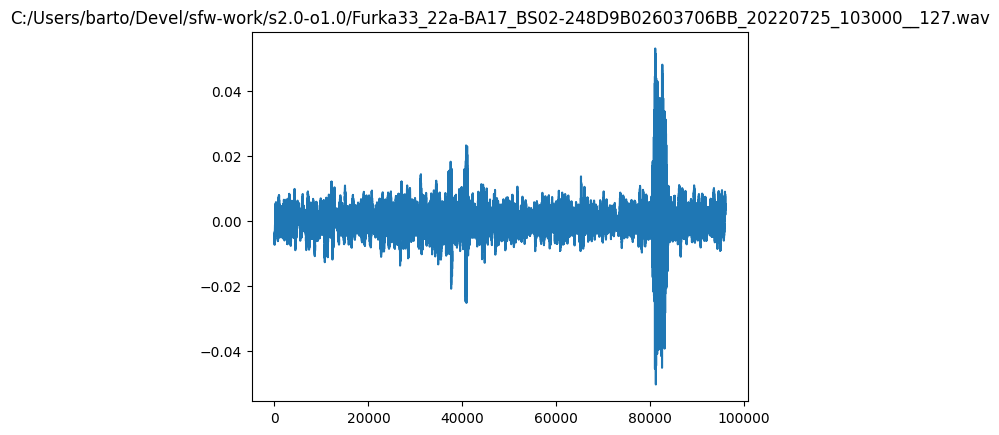

c:\users\barto\devel\repos\pycharmprojects\snowfinchwire.broodanalyzer\venv\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\users\barto\devel\repos\pycharmprojects\snowfinchwire.broodanalyzer\venv\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Raw signal: period = nan, mean from peaks = 0.052978515625, r max = 0.052978515625


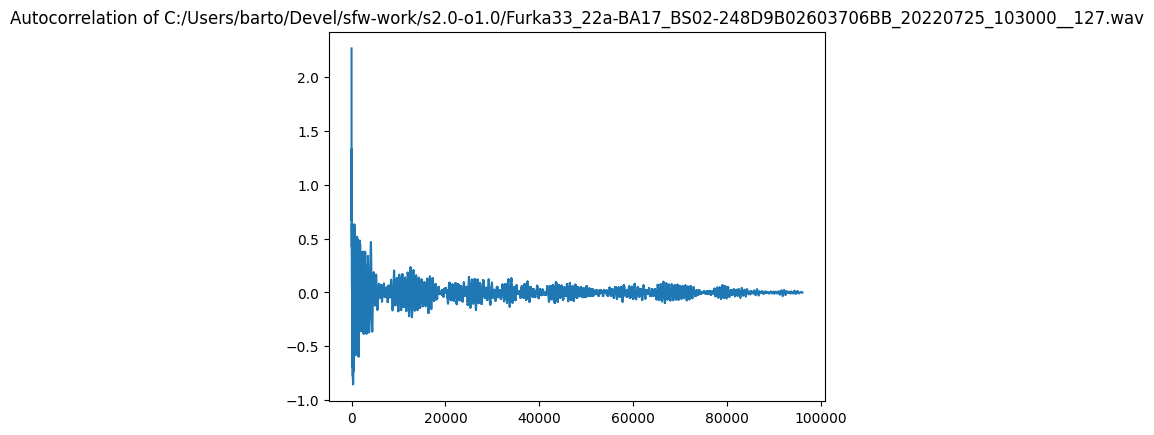

Autocorrelation: period = 12564.0, mean from peaks = 0.2341699618846178, r max = 0.2341699618846178


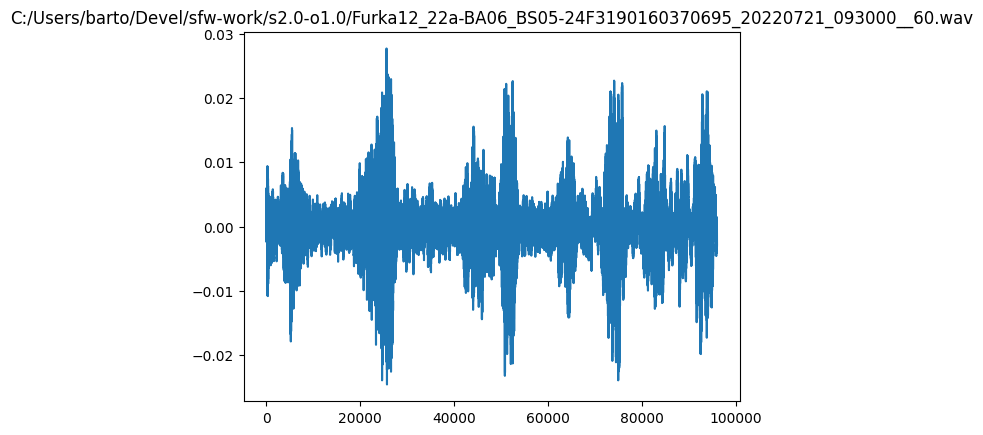

Raw signal: period = 22729.666666666668, mean from peaks = 0.02349853515625, r max = 0.027679443359375


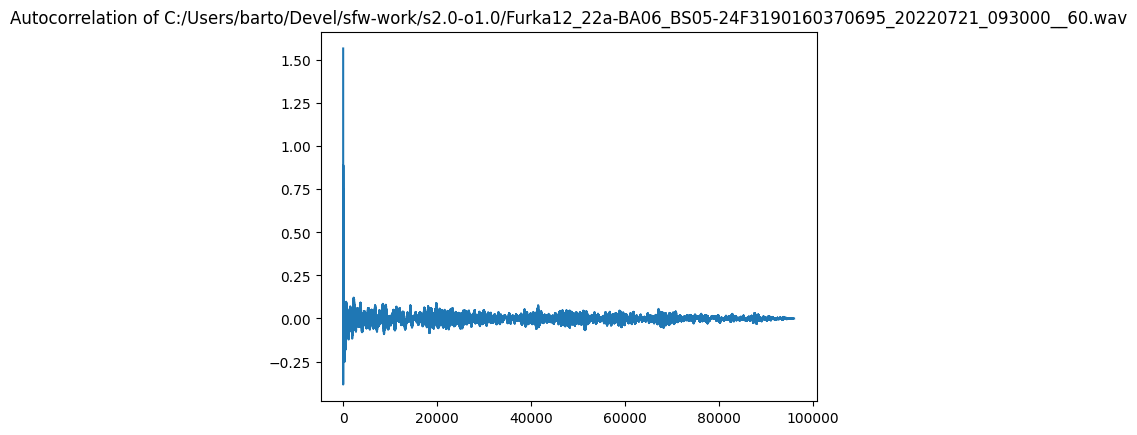

Autocorrelation: period = 20756.0, mean from peaks = 0.08347340766340494, r max = 0.08957570977509022


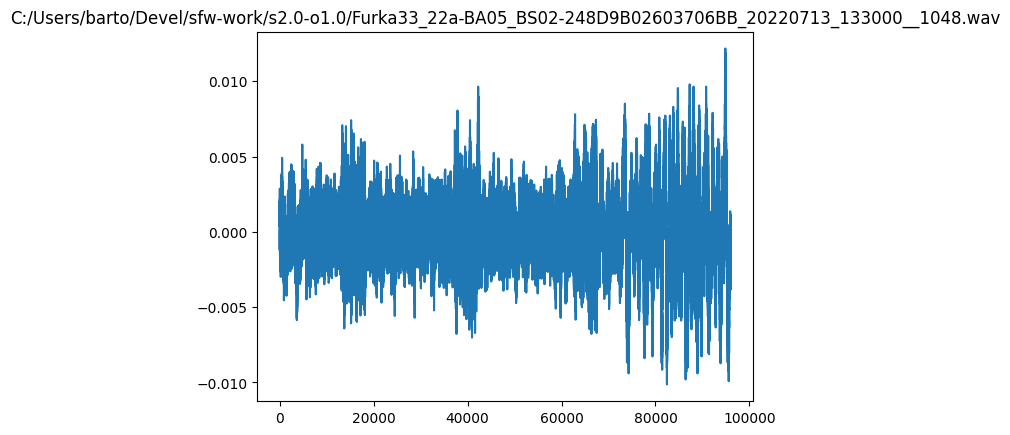

Raw signal: period = 26311.0, mean from peaks = 0.010457356770833334, r max = 0.012176513671875


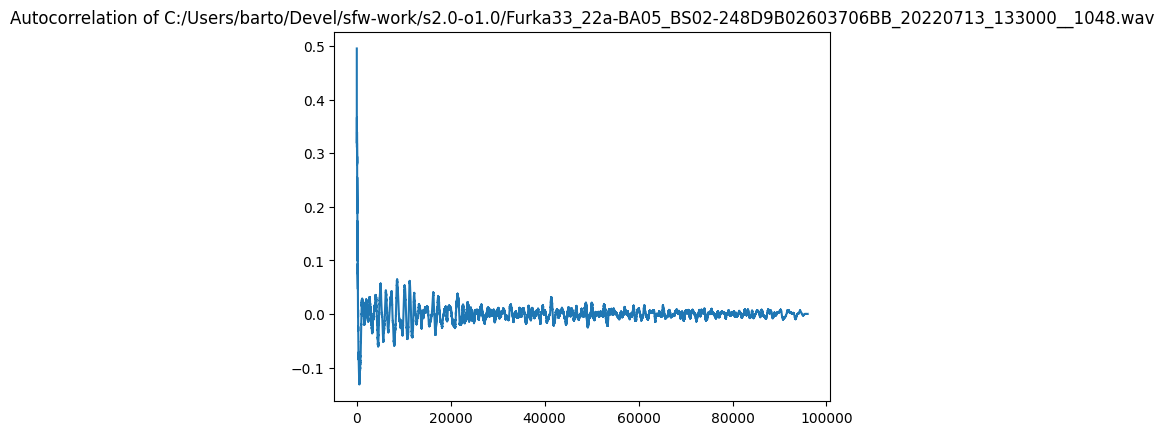

Autocorrelation: period = 11255.0, mean from peaks = 0.06179036106914282, r max = 0.06179036106914282


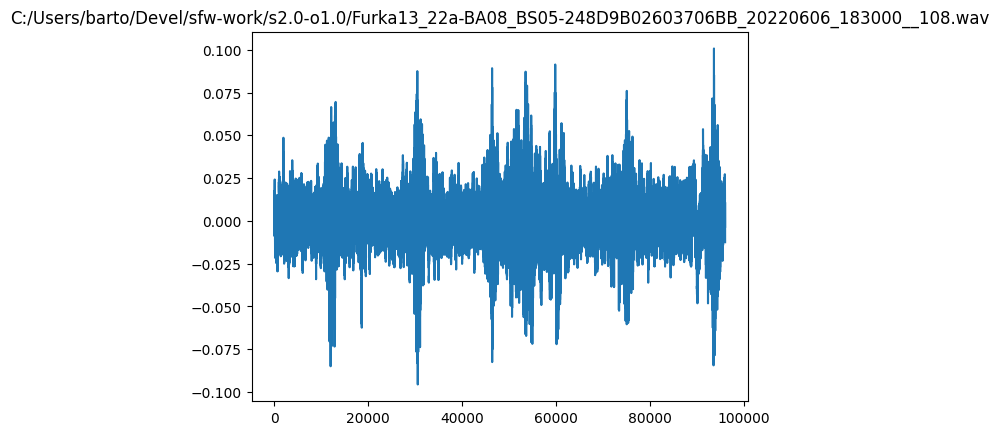

Raw signal: period = 15788.5, mean from peaks = 0.088983154296875, r max = 0.10076904296875


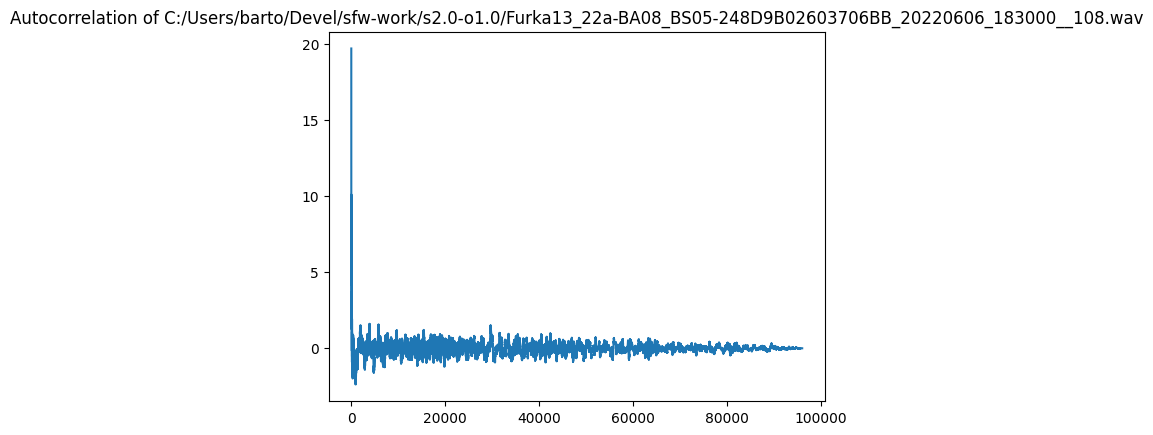

Autocorrelation: period = 14832.5, mean from peaks = 1.3580344757065177, r max = 1.5084654046222568


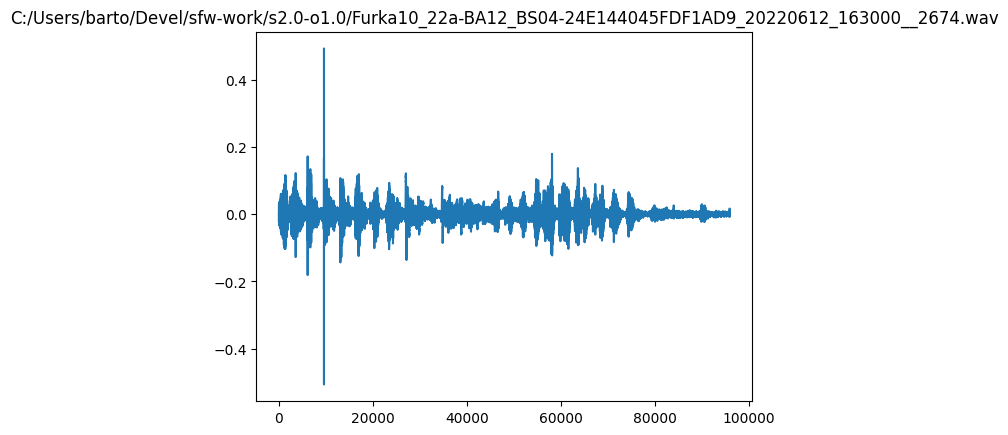

Raw signal: period = nan, mean from peaks = 0.49249267578125, r max = 0.49249267578125


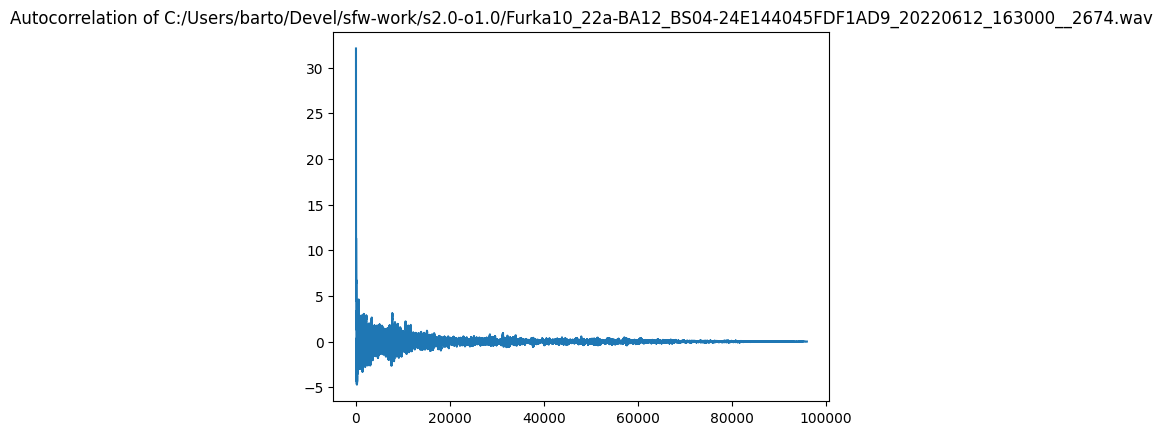

Autocorrelation: period = 10553.0, mean from peaks = 2.209205459803343, r max = 2.209205459803343


In [4]:
for i in range(len(bs_data)):
    file = bs_data.iloc[i]['file']
    sound, sr = sf.read(file)
    plot_signal(sound, file)

    t, peak_mean, r_max = estimate_period_raw(file, tolerance = 0.2)
    print(f'Raw signal: period = {t}, mean from peaks = {peak_mean}, r max = {r_max}')

    r = autocorrelate(sound)
    plot_autocorrelation(r, file)

    t2, peak_mean_2, r_max_2 = estimate_period_from_lags(r, sr, tolerance = 0.2)
    print(f'Autocorrelation: period = {t2}, mean from peaks = {peak_mean_2}, r max = {r_max_2}')